In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [ ]:
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

     # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.005)),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.005)),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.005)),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.005)),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.005)),
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.005)),
    Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')   # 10 classes
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,517,178 (5.79 MB)

 Trainable params: 1,514,266 (5.78 MB)

 Non-trainable params: 2,912 (11.38 KB)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train Model with Data Augmentation
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_test, y_test),
                    batch_size=512,verbose=1)

Epoch 1/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 234ms/step - accuracy: 0.1772 - loss: 9.1286 - val_accuracy: 0.1000 - val_loss: 6.4800
Epoch 2/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.3411 - loss: 5.2393 - val_accuracy: 0.1007 - val_loss: 4.1634
Epoch 3/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.4262 - loss: 3.0655 - val_accuracy: 0.1273 - val_loss: 3.1825
Epoch 4/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.4787 - loss: 2.1643 - val_accuracy: 0.1992 - val_loss: 2.6600
Epoch 5/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.5231 - loss: 1.7902 - val_accuracy: 0.4108 - val_loss: 2.0090
Epoch 6/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.5689 - loss: 1.5865 - val_accuracy: 0.4948 - val_loss: 1.8045
Epoch 7/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.5847 - loss: 1.4842 - val_accuracy: 0.6036 - val_loss: 1.4955
Epoch 8/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.6098 - loss: 1.4057 - val_accuracy: 0.6

313/313 - 4s - 13ms/step - accuracy: 0.8444 - loss: 0.7652

✅ Test Accuracy: 0.8444


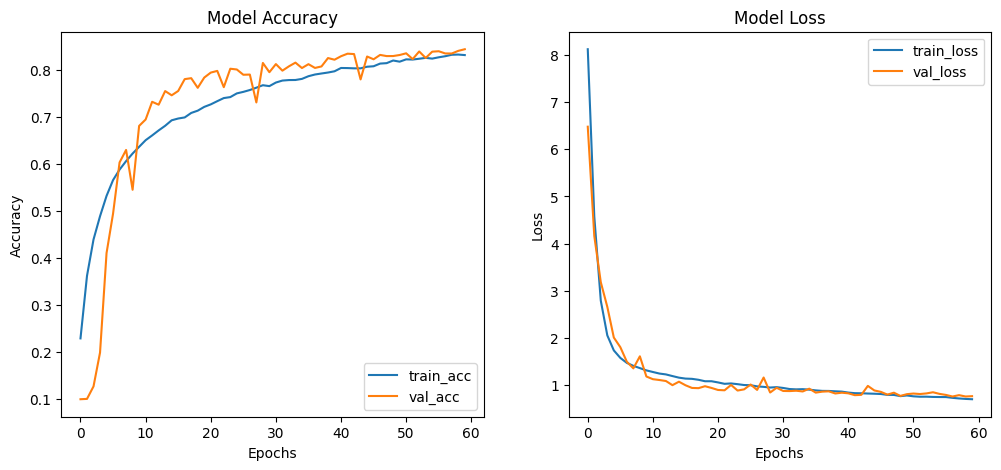

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# 7. Plot Accuracy & Loss
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Loss")

plt.show()

In [ ]:
img_path='/content/vecteezy_speed-boat-at-low-tide-heading-out-to-sea_6831341.jpg'

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def predict_image(model, img_path):
    """
    Predict class of a single image using trained CIFAR-10 model.
    """
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # convert BGR to RGB
    img_resized = cv2.resize(img, (32, 32))      # CIFAR-10 input size

    # Normalize
    img_norm = img_resized / 255.0

    # Predict
    pred = model.predict(img_norm.reshape(1, 32, 32, 3))
    pred_class = np.argmax(pred)

    # Show image
    plt.imshow(img_resized)
    plt.axis("off")
    plt.title(f"Predicted: {class_names[pred_class]}")
    plt.show()

    return class_names[pred_class]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


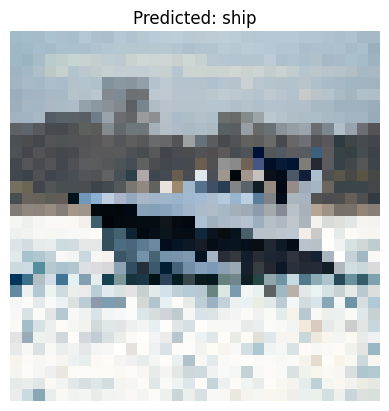

In [ ]:
import numpy as  np
import cv2
result = predict_image(model, "/content/vecteezy_speed-boat-at-low-tide-heading-out-to-sea_6831341.jpg")